In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/technical-customer-support-data/technical_support_data.csv


In [3]:
data= pd.read_csv('../input/technical-customer-support-data/technical_support_data.csv')
data.head(10)

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROBLEM_TYPE           23 non-null     object 
 1   no_of_cases            23 non-null     int64  
 2   Avg_pending_calls      23 non-null     float64
 3   Avg_resol_time         23 non-null     int64  
 4   recurrence_freq        23 non-null     float64
 5   Replace_percent        23 non-null     float64
 6   In_warranty_percent    23 non-null     int64  
 7   Post_warranty_percent  23 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ KB


In [5]:
data.shape

(23, 8)

In [6]:
data.describe()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,142.782609,1.973913,63.000000,0.137826,0.100000,69.956522,30.043478
std,155.098197,0.982676,58.877376,0.118627,0.182109,37.350281,37.350281
min,3.000000,1.000000,5.000000,0.010000,0.000000,5.000000,0.000000
25%,23.500000,1.150000,17.000000,0.025000,0.000000,55.000000,0.000000
50%,72.000000,2.000000,35.000000,0.140000,0.000000,90.000000,10.000000
75%,211.500000,2.300000,128.500000,0.235000,0.130000,100.000000,45.000000
max,520.000000,4.300000,180.000000,0.350000,0.700000,100.000000,95.000000


In [7]:
data.isnull().any()

PROBLEM_TYPE             False
no_of_cases              False
Avg_pending_calls        False
Avg_resol_time           False
recurrence_freq          False
Replace_percent          False
In_warranty_percent      False
Post_warranty_percent    False
dtype: bool

In [8]:
data.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

only PROBLeM_TYPE column has object type data
rest all have numerical type data

In [9]:
# taking only selected columns
data_attr = data.iloc[:, 1:] #  1st : means all rows and 1: means from 1st column to last column

In [10]:
data_scaled= data_attr.apply(zscore)

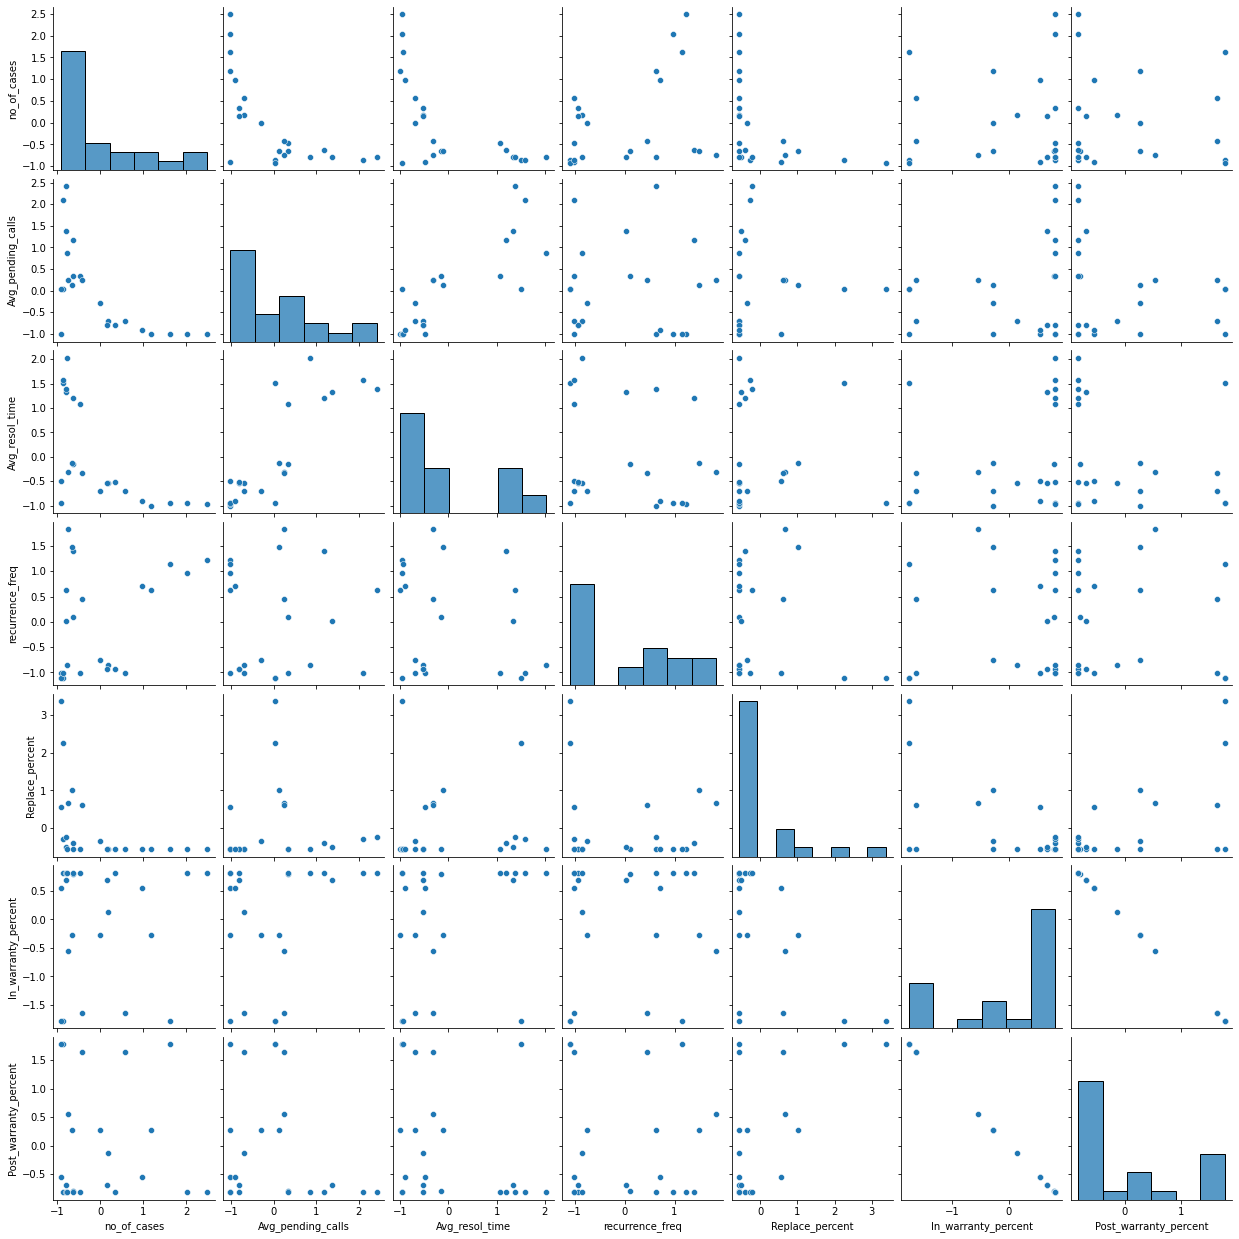

In [11]:
sns.pairplot(data_scaled)

In [14]:
# applying elbow method
# to find number of k centroids
from scipy.spatial.distance import cdist
cluster = range(1,10)
meandistortions = []
for k in cluster:
    model= KMeans(n_clusters= k) # this is the variable k of for loop
    model.fit(data_scaled)
    pred = model.predict(data_scaled)
    meandistortions.append(sum(np.min(cdist(data_scaled, model.cluster_centers_,'euclidean'), axis= 1))/data_scaled.shape[0])
    # cdist we imported from scipy it compute distance between 2 data points
    # mode.cluster_centers_ are measuring centroids of the clusters
    # using euclidean distance formula
    # and data_scled.shape[0] gives the number of rows 
    # we divided the meandistortions to get the mean / average of the value

Text(0, 0.5, 'Distortions')

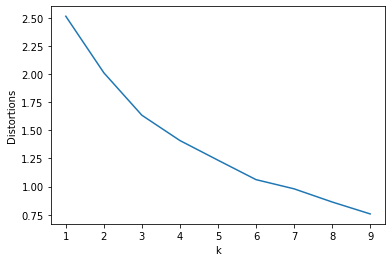

In [15]:
plt.plot(cluster, meandistortions)
plt.xlabel('k')
plt.ylabel('Distortions')

THe curve is not smooth so we will try different k values and se their performance
<br>
"Right now K is 9"


In [20]:
# lets try with k =3 
# as for 5 curve is not so smooth
# WE have to take k value more than 2 
# 
model1= KMeans(3)
model1.fit(data_scaled)
pred= model1.predict(data_scaled)

In [23]:
data['group']= pred
data_scaled['group']= pred

In [24]:
print('Groups Assigned')
data.head(10)

Groups Assigned


,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,group
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,1
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,1
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,0
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,0
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,1


In [25]:
data_clusters= data.groupby(['group'])
data_clusters.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
group,,,,,,,
0,250.444444,1.166667,20.666667,0.125556,0.026667,85.555556,14.444444
1,35.000000,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
2,112.142857,1.828571,47.857143,0.165714,0.272857,20.714286,79.285714


group/cluster 0 has 250 data points
<br>
group/cluster 1 has 35 data points
<br>
group/cluster 2 has 112 data points
<br>
<h4> we can observe that less the number of cases more the the avg_pending and avg_resolve time<h4>
<br>
    which is a bad thing

lets select other k value

In [33]:
model2= KMeans(5)
model2.fit(data_scaled)
pred= model1.predict(data_scaled)
data['group']= pred
data_scaled['group']= pred

In [34]:
data_clusters= data.groupby(['group'])
data_clusters.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
group,,,,,,,
0,395.25,1.025000,7.750000,0.240000,0.000000,87.500000,12.500000
1,35.00,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
2,154.00,1.760000,35.400000,0.228000,0.142000,27.000000,73.000000
3,134.60,1.280000,31.000000,0.034000,0.048000,84.000000,16.000000
4,7.50,2.000000,79.000000,0.010000,0.600000,5.000000,95.000000


In [35]:
# we can affermatively confirm that less the number of cases more the time taken to resolve the problem